In [1]:
from product_class import Product
from category_class import Category
import numpy as np
from scipy import stats
import datetime
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from workalendar.usa import UnitedStates
from operator import itemgetter
import pandas as pd

In [2]:
products = list(np.load('product_electronics_test_ratings.npy', allow_pickle=True))
products = [Product(i) for i in products]
cat = Category(products)
# print(len(cat.product_list))
# cat.holiday_correlation(2018, False)
b = cat.price_variation()
print(b)

36062
4      0.059562
         ...   
555   -0.058359
556   -0.057757
557    0.057757
559    0.000000
561    0.000000
Name: standardized, Length: 501, dtype: float64, 0      0.000000
1     -0.008234
3      3.943342
4     -3.903740
5     -0.159192
         ...   
429   -0.002745
430    0.176837
432    0.000000
433   -0.003921
434    0.001960
Name: standardized, Length: 412, dtype: float64, 1     0.000000
2     0.350964
3    -0.376396
5     1.225830
6    -0.002543
7    -0.831632
8     0.963879
9     0.549335
10   -1.513214
11    3.110353
12   -1.558991
14    0.000000
15   -1.551362
17    0.000000
18    1.393682
19    0.071210
20   -1.464892
21    1.464892
22   -1.505584
23   -0.073753
24    1.014743
25   -1.457263
27    0.000000
28    0.541705
29   -0.127161
30   -0.414544
31    3.667318
32   -3.110353
Name: standardized, dtype: float64, 0       0.000000
1      -0.750551
2       0.750551
3      -4.593701
5       0.000000
          ...   
1431   -0.000741
1432    0.001482
1433   -0.027414

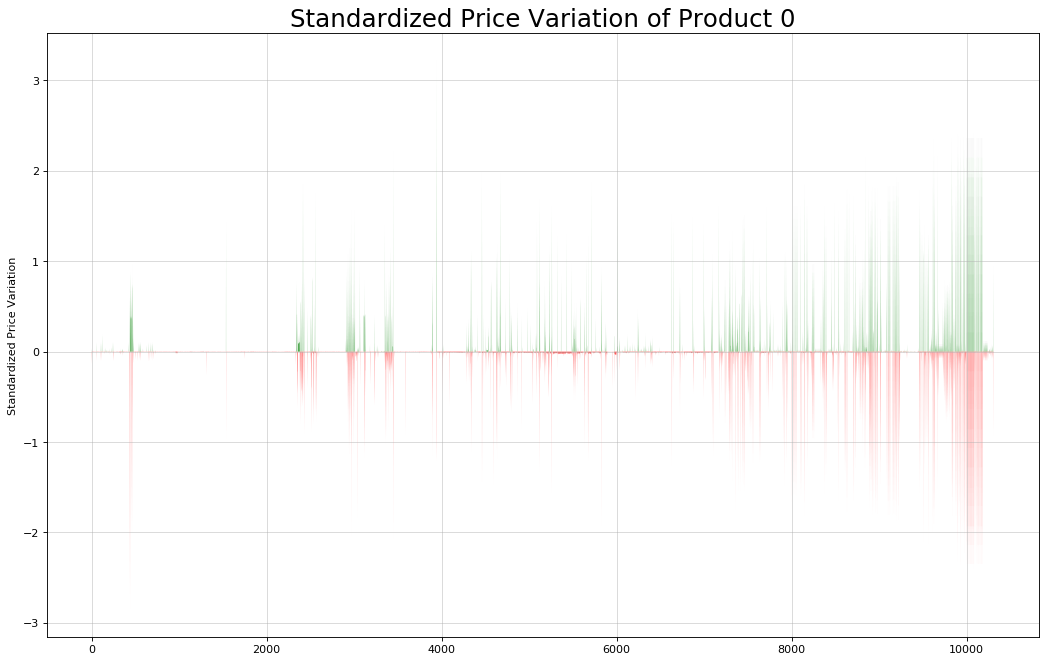

In [22]:
import numpy as np
import pandas as pd

# Prepare Data
df = products[0].df
x = np.arange(df.shape[0])
y_returns = b[0]

# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Decorations
# xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.amazon_time.dt.year, df.amazon_time.dt.month_name(), df.amazon_time.dt)]
xtickvals = list(df.amazon_time.dt.strftime("%m/%d/%Y, %H:%M:%S"))
# plt.gca().set_xticks(x[::6])
# plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
# plt.ylim(-35,35)
# plt.xlim(1,100)
plt.title("Standardized Price Variation of Product 0", fontsize=22)
plt.ylabel('Standardized Price Variation')
plt.grid(alpha=0.5)
plt.show()

In [10]:
df

,amazon_time,amazon_price,normalized,standardized,derivative
0,2015-06-10 06:00:00,207.53,1.000000,2.204547,0.000
2,2015-06-10 11:50:00,207.53,1.000000,2.204547,-1.280
3,2015-06-10 14:02:00,204.97,0.977323,2.067378,-0.980
4,2015-06-10 23:48:00,205.57,0.982638,2.099527,0.250
5,2015-06-11 03:30:00,205.47,0.981752,2.094169,-0.090
...,...,...,...,...,...
10309,2019-11-21 06:20:00,131.50,0.326513,-1.869253,7.995
10310,2019-11-21 07:56:00,129.99,0.313137,-1.950161,-0.800
10311,2019-11-25 20:44:00,129.90,0.312339,-1.954983,-0.195
10312,2019-11-26 00:24:00,129.60,0.309682,-1.971058,0.045


In [17]:
list(xtickvals)

23/2015, 00:52:00',
 '06/23/2015, 01:52:00',
 '06/23/2015, 02:53:00',
 '06/23/2015, 04:07:00',
 '06/23/2015, 05:07:00',
 '06/23/2015, 06:37:00',
 '06/23/2015, 07:36:00',
 '06/23/2015, 08:38:00',
 '06/23/2015, 09:37:00',
 '06/23/2015, 10:36:00',
 '06/23/2015, 11:36:00',
 '06/23/2015, 12:37:00',
 '06/23/2015, 13:36:00',
 '06/23/2015, 14:37:00',
 '06/23/2015, 15:46:00',
 '06/23/2015, 17:46:00',
 '06/23/2015, 19:45:00',
 '06/23/2015, 20:47:00',
 '06/23/2015, 21:45:00',
 '06/23/2015, 23:15:00',
 '06/24/2015, 00:15:00',
 '06/24/2015, 01:17:00',
 '06/24/2015, 02:15:00',
 '06/24/2015, 04:13:00',
 '06/24/2015, 05:13:00',
 '06/24/2015, 06:13:00',
 '06/24/2015, 07:16:00',
 '06/24/2015, 08:43:00',
 '06/24/2015, 10:43:00',
 '06/24/2015, 11:44:00',
 '06/24/2015, 12:43:00',
 '06/24/2015, 13:41:00',
 '06/24/2015, 14:43:00',
 '06/24/2015, 16:42:00',
 '06/24/2015, 18:12:00',
 '06/24/2015, 19:13:00',
 '06/24/2015, 21:12:00',
 '06/24/2015, 22:26:00',
 '06/24/2015, 23:26:00',
 '06/25/2015, 00:30:00',
 '06/